In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # Plotting
%matplotlib inline
import seaborn as sns # Plotting
from sklearn.model_selection import train_test_split #Importing train and test splitting functionality from sklearn


In [ ]:
loan = pd.read_csv('LoanStats.csv') #Reading the Data from a CSV file and converting to Pandas DataFrame

In [ ]:
loan.head() #Printing first 5 rows and all the columns from DataFrame

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


### Data Understanding

In [ ]:
loan.shape #Total number of (rows,columns)

(39786, 7)

In [ ]:
loan.dtypes #Printing the type of Data in all the columns

int_rate          float64
loan_amnt           int64
term                int64
grade              object
home_ownership     object
annual_inc        float64
purpose            object
dtype: object

In [ ]:
loan.describe()

,int_rate,loan_amnt,term,annual_inc
count,39786.000000,39786.000000,39786.000000,3.978600e+04
mean,12.027873,11231.360277,42.448499,6.897907e+04
std,3.727466,7464.542832,10.638782,6.376263e+04
min,5.420000,500.000000,36.000000,4.000000e+03
25%,9.250000,5500.000000,36.000000,4.050000e+04
50%,11.860000,10000.000000,36.000000,5.900000e+04
75%,14.590000,15000.000000,60.000000,8.234250e+04
max,24.590000,35000.000000,60.000000,6.000000e+06


In [ ]:
loan.describe(include='object')

,grade,home_ownership,purpose
count,39786,39786,39786
unique,7,5,14
top,B,RENT,debt_consolidation
freq,12035,18918,18676


In [ ]:
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   int_rate        39786 non-null  float64
 1   loan_amnt       39786 non-null  int64  
 2   term            39786 non-null  int64  
 3   grade           39786 non-null  object 
 4   home_ownership  39786 non-null  object 
 5   annual_inc      39786 non-null  float64
 6   purpose         39786 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB


#### plotting multiple graphs in a grid continuous variable

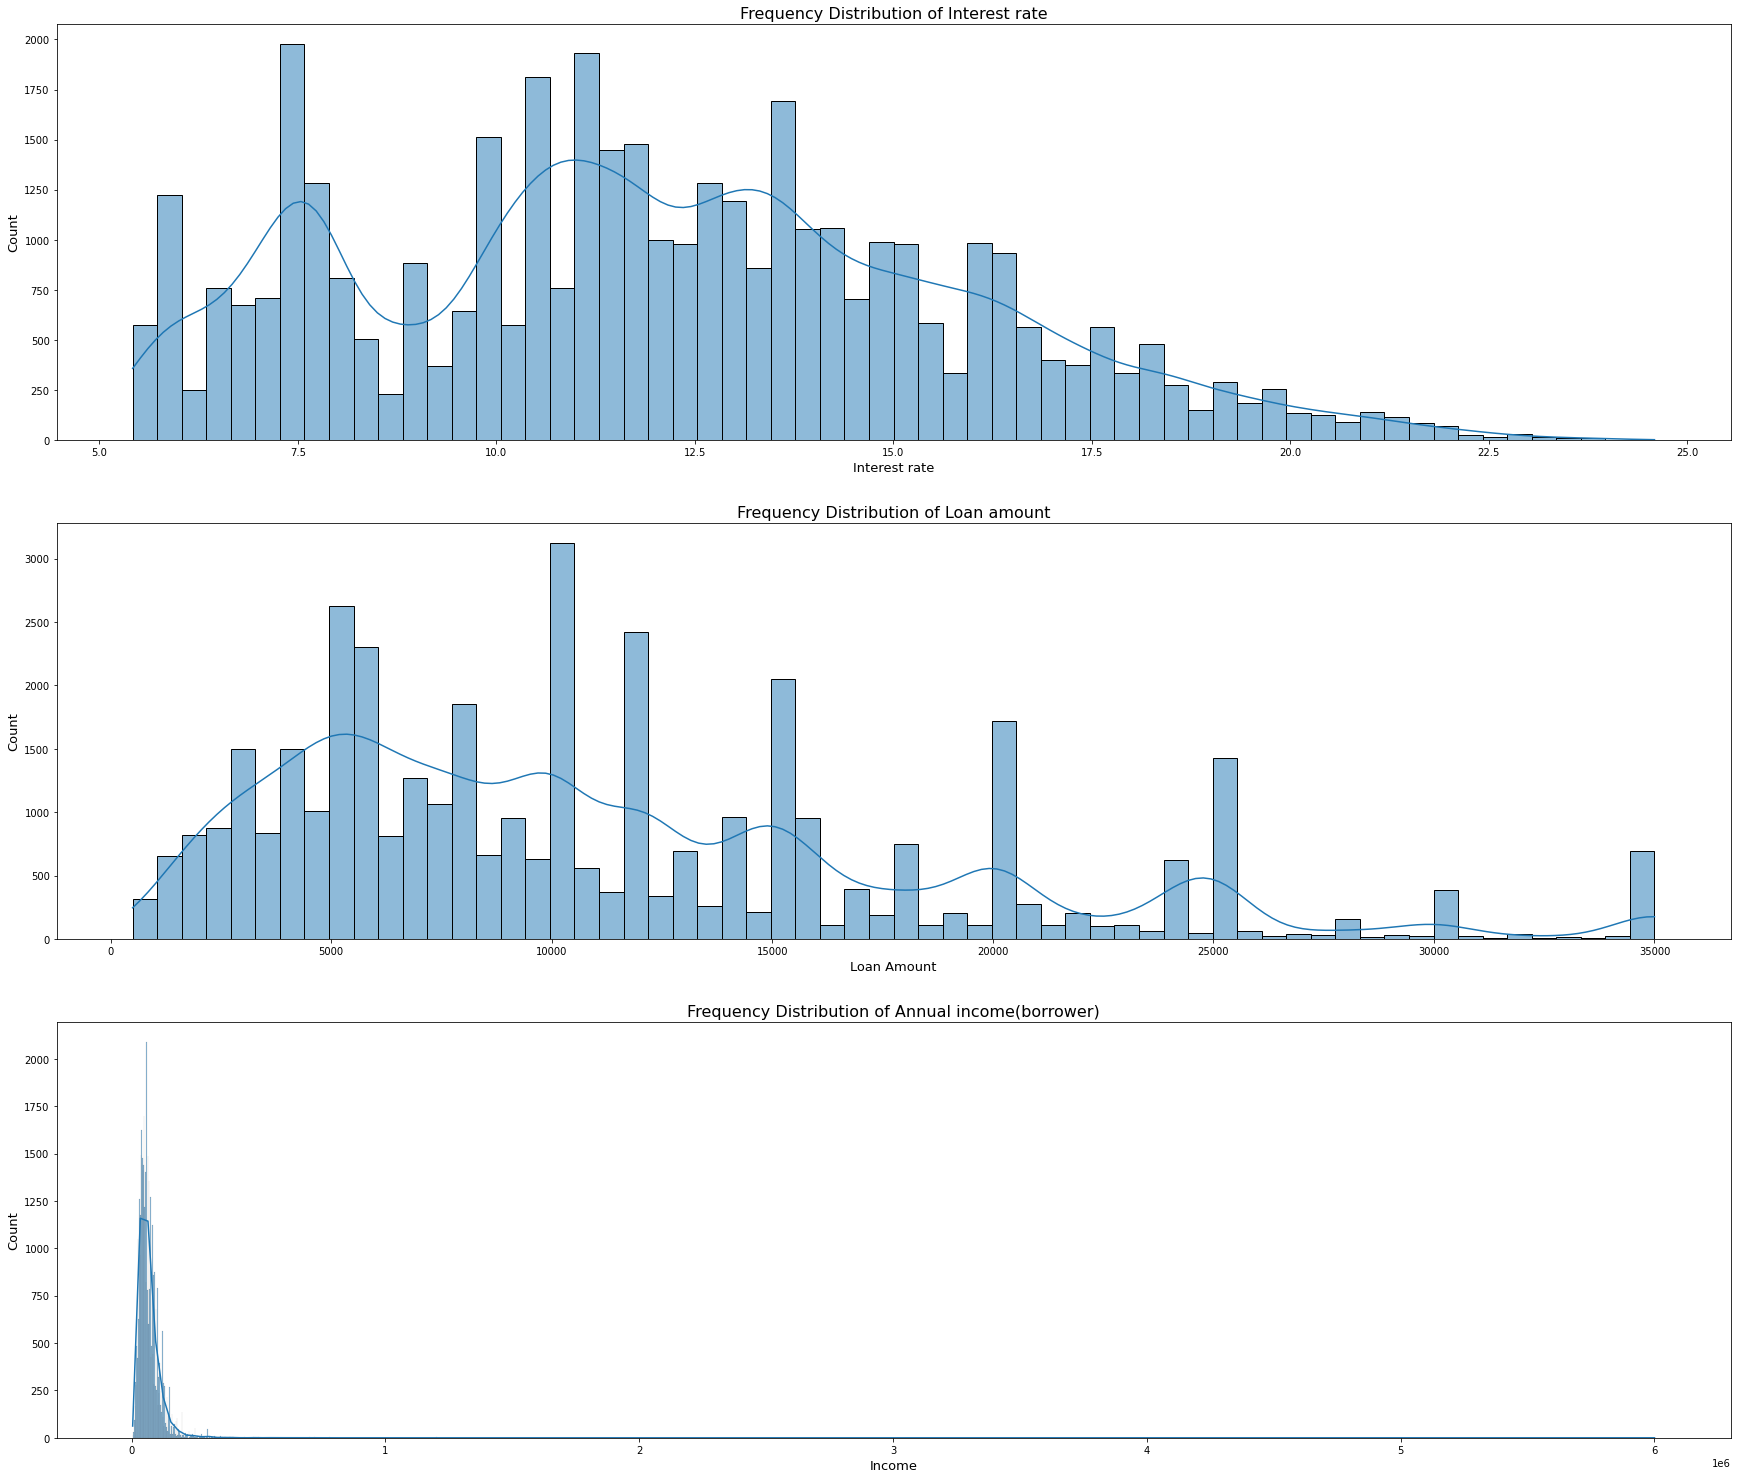

In [ ]:
# plotting multiple graphs in a grid continuous variable
fig, axes = plt.subplots(3,1,figsize=(30,26))

# cumulative frequency distribution for 'interest rate'
sns.histplot(loan.int_rate, kde=True, ax=axes[0])
ax=axes[0].set_title('Frequency Distribution of Interest rate',fontsize=16)
ax=axes[0].set_xlabel('Interest rate',fontsize=13)
ax=axes[0].set_ylabel('Count',fontsize=13)

# cumulative frequency distribution for 'loan amount'
sns.histplot(loan.loan_amnt, kde=True, ax=axes[1])
ax=axes[1].set_title('Frequency Distribution of Loan amount',fontsize=16)
ax=axes[1].set_xlabel('Loan Amount',fontsize=13)
ax=axes[1].set_ylabel('Count',fontsize=13)

# cumulative frequency distribution for'annual increament'
sns.histplot(loan.annual_inc, kde=True, ax=axes[2])
ax=axes[2].set_title('Frequency Distribution of Annual income(borrower)',fontsize=16)
ax=axes[2].set_xlabel('Income',fontsize=13)
ax=axes[2].set_ylabel('Count',fontsize=13)

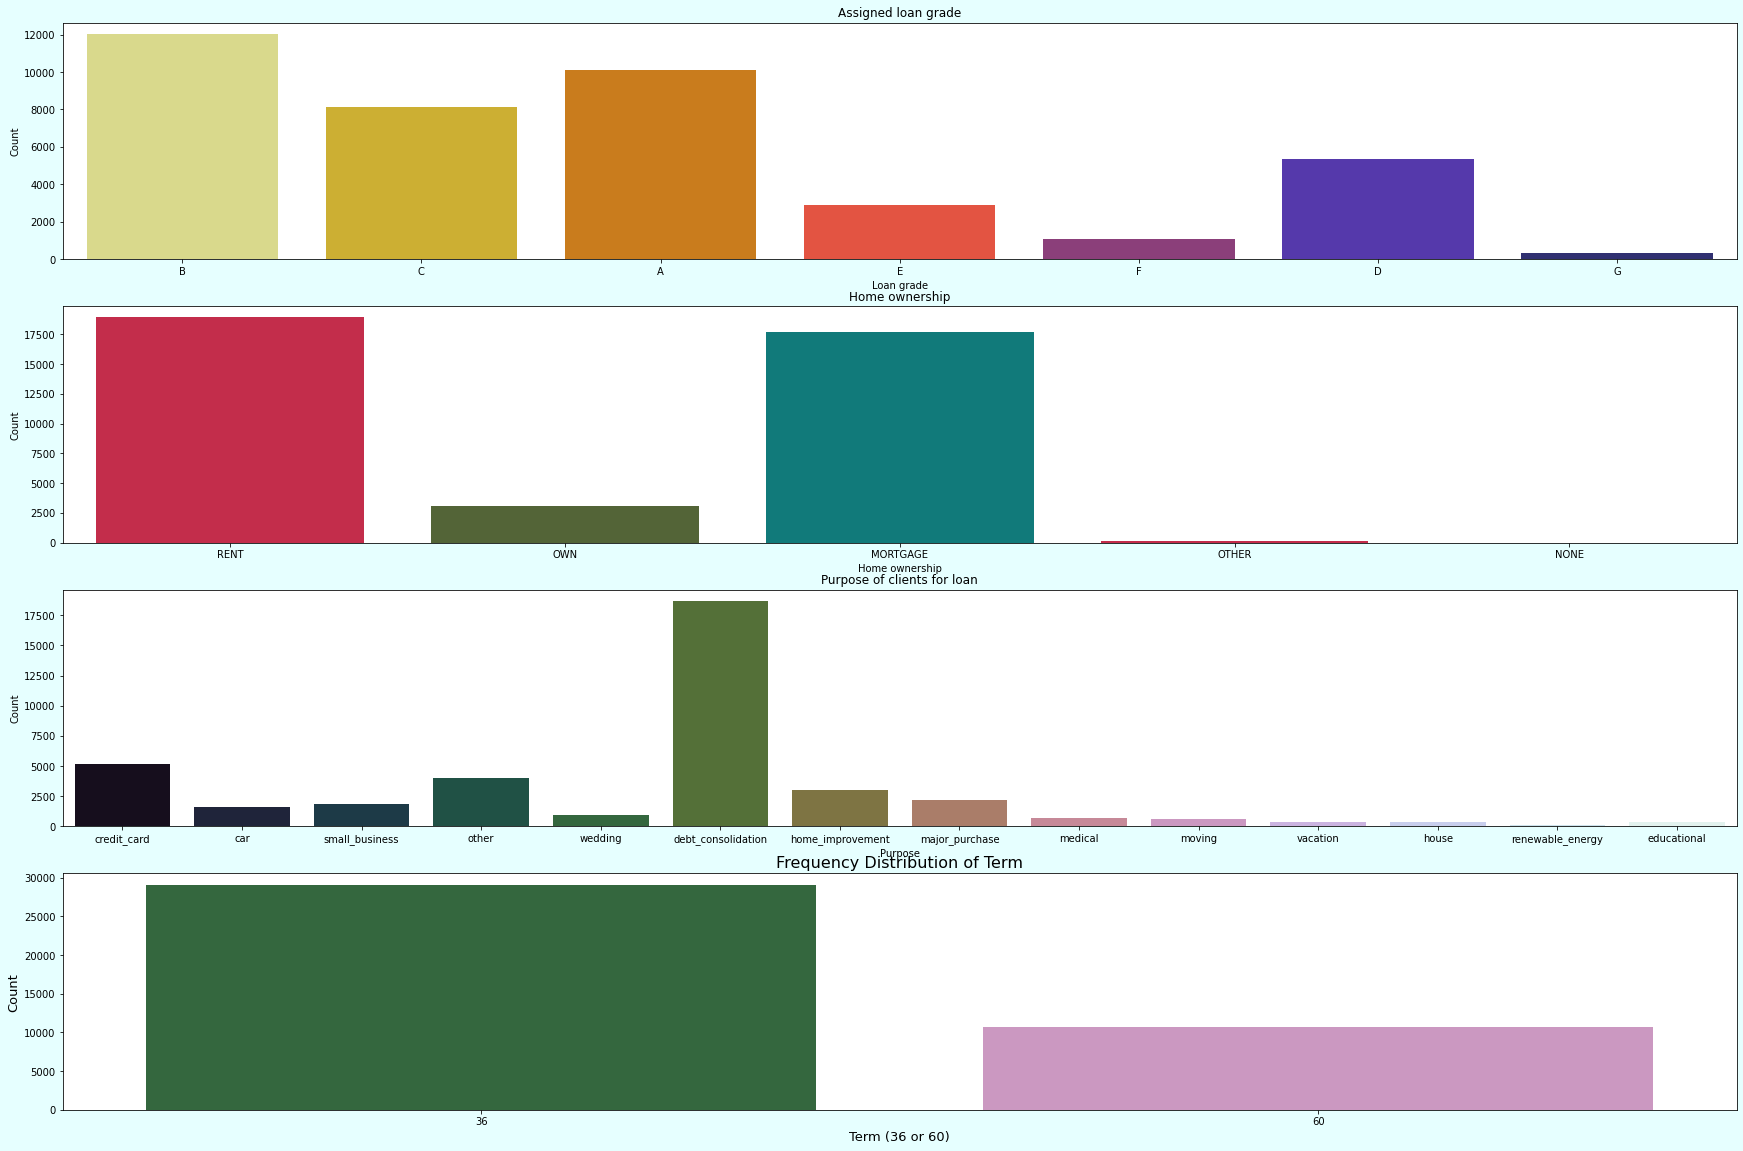

In [ ]:
#plotting multiple graphs in a grid categorical variable
fig, axes = plt.subplots(4,1,figsize=(30,20),facecolor='#e6ffff')
# countplot for 'grade'
sns.countplot(x=loan["grade"], ax=axes[0], palette='CMRmap_r')
axes[0].set_title('Assigned loan grade', fontsize=12)
axes[0].set_xlabel('Loan grade', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)

# countplot for 'home_ownership' 
sns.countplot(x=loan["home_ownership"], ax=axes[1], palette=['#DC143C','#556b2f','#008b8b'])
axes[1].set_title('Home ownership', fontsize=12)
axes[1].set_xlabel('Home ownership', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)

# countplot for 'purpose'
sns.countplot(x=loan["purpose"], ax=axes[2],palette='cubehelix')
axes[2].set_title('Purpose of clients for loan', fontsize=12)
axes[2].set_xlabel('Purpose', fontsize=10)
axes[2].set_ylabel('Count', fontsize=10)

# countplot for'term'
sns.countplot(x = loan['term'], ax=axes[3], palette = 'cubehelix')
ax=axes[3].set_title('Frequency Distribution of Term',fontsize=16)
ax=axes[3].set_xlabel('Term (36 or 60)',fontsize=13)
ax=axes[3].set_ylabel('Count',fontsize=13)



# 3. Data preparation

In [ ]:
loan.isnull().sum()   # We do not have any null values. 
                      # Therefore imputation is not needed.

int_rate          0
loan_amnt         0
term              0
grade             0
home_ownership    0
annual_inc        0
purpose           0
dtype: int64

## Correlation of variables

In [ ]:
loan.head() 

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


In [ ]:
# Assigning the numeric columns from the dataset 
numericColumns = ['loan_amnt','annual_inc','int_rate']

# Assigning categorical columns 
catCols = ['term','grade','home_ownership','purpose']

            loan_amnt  annual_inc  int_rate
loan_amnt    1.000000    0.271340  0.310481
annual_inc   0.271340    1.000000  0.053485
int_rate     0.310481    0.053485  1.000000


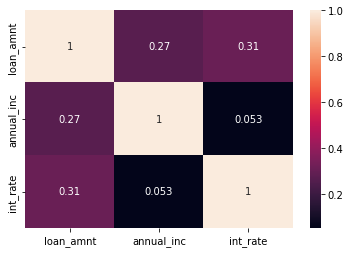

In [ ]:
# Creating a correlation matrix 
correlationMatrix  = loan.loc[:,numericColumns].corr()
# Printing the correlation matrix.
print(correlationMatrix)
# Displaying the correlation matrix
sns.heatmap(correlationMatrix, annot=True)


# correlation matrixs shows less correlation between annual_inc and int_rate.
# Correlation is less, therefore columns are not dropped.

## converting categorical variables 

In [ ]:
loan = pd.get_dummies(loan, columns = catCols) # catCols contains variables that are categorical

In [ ]:
loan.head()

,int_rate,loan_amnt,annual_inc,term_36,term_60,grade_A,grade_B,grade_C,grade_D,grade_E,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10.65,5000,24000.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.27,2500,30000.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.96,2400,12252.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,13.49,10000,49200.0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,12.69,3000,80000.0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## scaling the dataset

In [ ]:
loan.dtypes

int_rate                      float64
loan_amnt                       int64
annual_inc                    float64
term_36                         uint8
term_60                         uint8
grade_A                         uint8
grade_B                         uint8
grade_C                         uint8
grade_D                         uint8
grade_E                         uint8
grade_F                         uint8
grade_G                         uint8
home_ownership_MORTGAGE         uint8
home_ownership_NONE             uint8
home_ownership_OTHER            uint8
home_ownership_OWN              uint8
home_ownership_RENT             uint8
purpose_car                     uint8
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_house                   uint8
purpose_major_purchase          uint8
purpose_medical                 uint8
purpose_moving                  uint8
purpose_othe

In [ ]:
# the variables are scaled here for better comparision in the modelling phase 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
loan_scaled = scaler.fit_transform(loan[['loan_amnt','annual_inc']])      #fit and transformed the nemeric data, interest rate is not scaled as it was targets variable
loan_scaled = pd.DataFrame(loan_scaled, columns= ['loan_amnt','annual_inc'])
 
print("Scaled Dataset Using MinMaxScaler")
loan_scaled.head()

Scaled Dataset Using MinMaxScaler


,loan_amnt,annual_inc
0,0.130435,0.003336
1,0.057971,0.004336
2,0.055072,0.001376
3,0.275362,0.007538
4,0.072464,0.012675


# 4. Modelling

#### splitting the dataset

In [ ]:
# X has other variables
x = loan.drop(['int_rate'], axis=1)

# Y has the target variable int_rate
y = loan[['int_rate']]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (39786, 30)
shape of y: (39786, 1)


In [ ]:
#Splitting data
#Since according to dataset's description, target values are highly imbalanced, so we split it in a stratified fashion.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, shuffle = True)

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (27850, 30)
shape of x_test:  (11936, 30)
shape of y_train:  (27850, 1)
shape of y_test:  (11936, 1)


In [ ]:
x_train.head()

,loan_amnt,annual_inc,term_36,term_60,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
23237,25000,85000.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10362,10800,117000.0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
27206,5500,36396.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35292,5000,249996.0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6048,10000,55000.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_train.isnull().sum() # again making sure there are no null values

loan_amnt                     0
annual_inc                    0
term_36                       0
term_60                       0
grade_A                       0
grade_B                       0
grade_C                       0
grade_D                       0
grade_E                       0
grade_F                       0
grade_G                       0
home_ownership_MORTGAGE       0
home_ownership_NONE           0
home_ownership_OTHER          0
home_ownership_OWN            0
home_ownership_RENT           0
purpose_car                   0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_house                 0
purpose_major_purchase        0
purpose_medical               0
purpose_moving                0
purpose_other                 0
purpose_renewable_energy      0
purpose_small_business        0
purpose_vacation              0
purpose_wedding               0
dtype: int64

In [ ]:
y_train.head()

,int_rate
23237,16.32
10362,5.42
27206,11.12
35292,8.59
6048,12.42


## Model

In [ ]:
# loading necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np

In [ ]:
# a function is made where any model can be fit and predict with r2 metrics
def run_experiment(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
model_lr = LinearRegression() # lineraregression with default parameters
run_experiment(model_lr)      # applying the function created to get the r^2

R^2 :  0.9258400597476872
MAE : 0.8078714737551769
RMSE: 1.0198982746715373


In [ ]:
model_rf = RandomForestRegressor() # RandomForestRegressor with default parameters
run_experiment(model_rf)           # applying the function created to get the r^2

# r^2 is bit less than linear regression

<ipython-input-25-06a689bbed1d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


R^2 :  0.9167613571595444
MAE : 0.8488928775750016
RMSE: 1.0805246199628675


**R Squared:** R Square is the coefficient of determination. It tells us how many points fall on the regression line. The value of R Square is 0.91, which indicates that 91.52% of the data fit the regression model.

**Mean Absolute Error:** Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance. A mean absolute error of 0 means that your model is a perfect predictor of the outputs. The mean absolute error obtained for this particular model is 0.855, which is pretty good as it is close to 0.

**Root Mean Square Error:** Root Mean Square Error is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as Mean Squared Error, but the root of the value is considered while determining the accuracy of the model. The lower the value, the better is the model’s performance. The root mean square error obtained for this particular model is 1.083, which is pretty good.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LogisticRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.pipeline import Pipeline

In [ ]:
# Initialze the estimators
# For getting better model i have used 7 different models
clf1 = RandomForestRegressor()
clf2 = Ridge()
clf3 = LogisticRegression()
clf4 = Lasso()
clf5 = DecisionTreeRegressor()
clf6 = PolynomialFeatures()
clf7 = GaussianProcessRegressor()

In [ ]:
# Initiaze the hyperparameters for each dictionary
# one or two parameters which are important are included here for grid search 
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__alpha'] = [0.1, 1, 10, 20, 100]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['none', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__alpha'] = [0.01, 0.1, 1, 10]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__criterion'] = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
param5['classifier__max_features'] = ['auto', 'sqrt', 'log2']
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__degree'] = [1,2,5,10]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__alpha'] = [0.01,0.1, 1, 10]
param7['classifier'] = [clf7]

In [ ]:
pipeline = Pipeline([('classifier', clf1)])    # pipeline contain all the classifiers 
params = [param1, param2, param3, param4, param5, param6, param7]  # all the parameters in the params list

## Grid Search CV:


In [ ]:
%%time
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=2, scoring='r2').fit(x_train, y_train)

In [ ]:
# Best performing model and its corresponding hyperparameters
print('Best parameters: ',gs.best_params_)
print('Best r2 score: ',gs.best_score_)

Best parameters:  {'classifier': RandomForestRegressor(max_depth=10, n_estimators=250), 'classifier__max_depth': 10, 'classifier__n_estimators': 250}
Best r2 score:  0.9264984651291654


RandomForestRegressor performed better than other models.

r2 score is 0.92 which is good.

In [ ]:
model_rf_new = RandomForestRegressor(max_depth=10, n_estimators=250) # RandomForestRegressor with new parameters from grid search
run_experiment(model_rf_new) 

<ipython-input-25-06a689bbed1d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


R^2 :  0.9289183808906449
MAE : 0.7864477485781327
RMSE: 0.9985063412887439


In [ ]:
#To show the predicted interest rate, here I am extracting total data for one label as an example
import numpy as np

predictions=model_rf_new.predict(x_test)
np.set_printoptions()
print('Predicted Lables: ', np.round(predictions)[:6])
print('Actual Lables: ', y_test[:6])
loan.iloc[39237]

Predicted Lables:  [ 7. 14. 13. 15. 11. 19.]
Actual Lables:         int_rate
31107      7.88
25736     13.98
761       13.49
39237     13.24
1749      12.69
25256     19.79


int_rate                         13.24
loan_amnt                     20000.00
annual_inc                    80000.00
term_36                           1.00
term_60                           0.00
grade_A                           0.00
grade_B                           0.00
grade_C                           0.00
grade_D                           1.00
grade_E                           0.00
grade_F                           0.00
grade_G                           0.00
home_ownership_MORTGAGE           1.00
home_ownership_NONE               0.00
home_ownership_OTHER              0.00
home_ownership_OWN                0.00
home_ownership_RENT               0.00
purpose_car                       0.00
purpose_credit_card               0.00
purpose_debt_consolidation        1.00
purpose_educational               0.00
purpose_home_improvement          0.00
purpose_house                     0.00
purpose_major_purchase            0.00
purpose_medical                   0.00
purpose_moving           